<a href="https://colab.research.google.com/github/ShaunakSen/Data-Science-and-Machine-Learning/blob/master/Applied_ML_CS_5785.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied ML - CS 5785

> GitHub: https://github.com/kuleshov/cornell-cs5785-applied-ml/tree/main/notebooks

> YouTube: https://www.youtube.com/playlist?list=PL2UML_KCiC0UlY7iCQDSiGDMovaupqc83

---




## Lecture 1. Part 2: Three Approaches to Machine Learning


### Supervised Learning Example

In [1]:
# We will load the dataset from the sklearn ML library
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
print (boston.data.shape, boston.target.shape)

(506, 13) (506,)


We will visualize two variables in this dataset: house price and the education level in the neighborhood.



Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

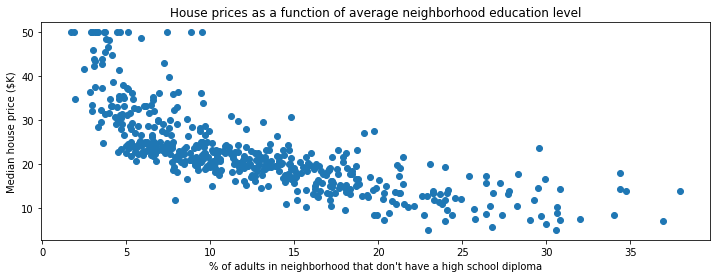

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter(boston.data[:,12], boston.target)
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in neighborhood that don't have a high school diploma")
plt.title("House prices as a function of average neighborhood education level")

We can use this dataset of examples to fit a supervised learning model.



In [5]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge

In [6]:
# Apply a supervised learning algorithm
model = KernelRidge(alpha=1, kernel='poly')
model.fit(boston.data[:,[12]], boston.target.flatten())

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='poly',
            kernel_params=None)

Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

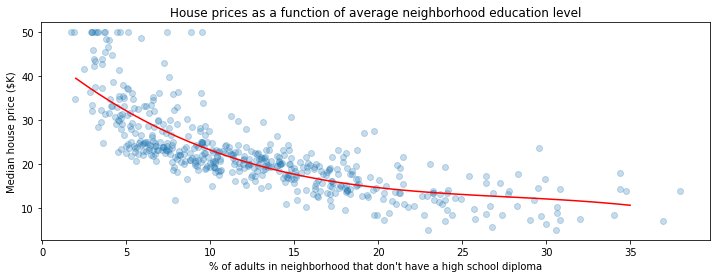

In [9]:
predictions = model.predict(np.linspace(2, 35)[:, np.newaxis])

# Visualize the results
plt.scatter(boston.data[:,[12]], boston.target, alpha=0.25)
plt.plot(np.linspace(2, 35), predictions, c='red')
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in neighborhood that don't have a high school diploma")
plt.title("House prices as a function of average neighborhood education level")

### Unsupervised Learning Example

Text(0.5, 1.0, 'Dataset of Iris flowers')

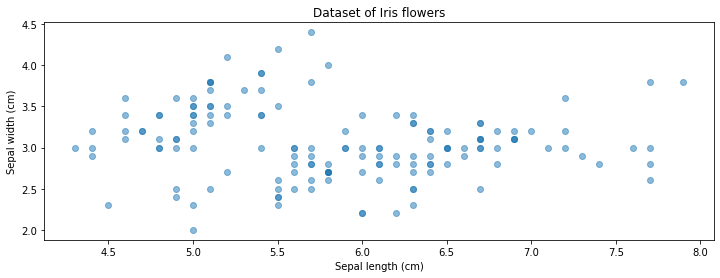

In [10]:
# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

In [11]:
# fit a Gaussian Mixture Model with three components
from sklearn import mixture

### n_componenets basically means we are trying to learn 3 clusters
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(iris.data[:,[0,1]])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

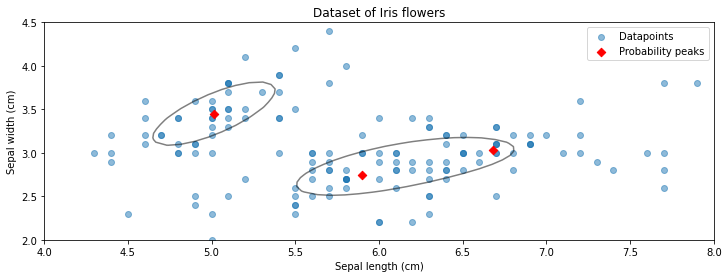

In [12]:
# display learned probabilities as a contour plot
x, y = np.linspace(4.0, 8.0), np.linspace(2.0, 4.5)
X, Y = np.meshgrid(x, y)
Z = -model.score_samples(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(0, 10, 1), cmap="gray", alpha=0.5)
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(['Datapoints', 'Probability peaks'])

Here we have kind of identified 3 centroids for the clusters

We can now show the original labels

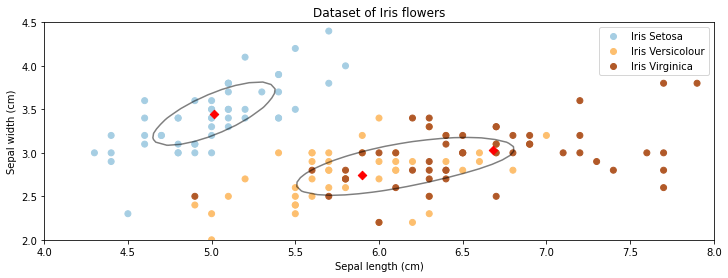

In [13]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 30, 1), cmap='gray', alpha=0.5)
p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

As we can see the centroids did roughly corr to teh centers of the 3 classes

## Lecture 2 - Part 1: A Supervised Machine Learning Problem


Let's return to our example: predicting diabates risk. What would a dataset look like?

We will use the UCI Diabetes Dataset; it's a toy dataset that's often used to demonstrate machine learning algorithms.

- For each patient we have a access to a measurement of their body mass index (BMI) and a quantiative diabetes risk score (from 0-400).
- We are interested in understanding how BMI affects an individual's diabetes risk.

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets


In [8]:
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
diabetes_X, diabetes_y = diabetes_data['data'], diabetes_data['target']

print (diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


In [9]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
# Use only the BMI feature
diabetes_X  = diabetes_X[:, 2]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

In [13]:
diabetes_X_train = diabetes_X[-20:]
diabetes_y_train = diabetes_y[-20:]

In [17]:
pd.DataFrame(data={'bmi': diabetes_X_train, 'target': diabetes_y_train})

,bmi,target
0,27.335902,233.0
1,23.811456,91.0
2,25.331171,111.0
3,23.779122,152.0
4,23.973128,120.0
5,25.169499,67.0
6,27.659245,310.0
7,24.005462,94.0
8,23.294106,183.0
9,24.070131,66.0


Text(0, 0.5, 'Diabetes Risk')

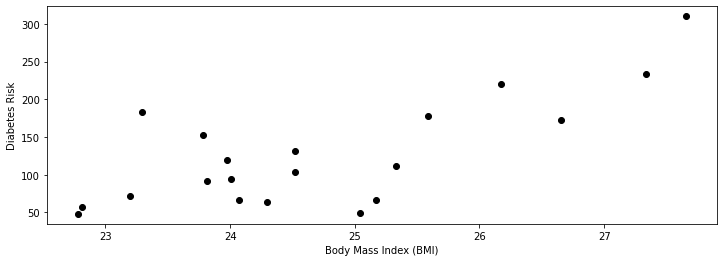

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

### A Supervised Learning Algorithm (Part 1)

What is the relationship between BMI and diabetes risk?

We could assume that risk is a linear function of BMI. In other words, for some unknown $\theta_0, \theta_1 \in \mathbb{R}$, we have
$$ y = \theta_1 \cdot x + \theta_0, $$
where $x$ is the BMI (also called the independent variable), and $y$ is the diabetes risk score (the dependent variable). 

Note that $\theta_1, \theta_0$ are the slope and the intercept of the line relates $x$ to $y$. We call them *parameters*.

We will see many algorithms for this task. For now, let's call the `sklearn.linear_model` library to find a $\theta_1, \theta_0$ that fit the data well.

In [24]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train.reshape(-1, 1), diabetes_y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train.reshape(-1, 1))

In [27]:
diabetes_y_train_pred

array([[224.70261326],
       [ 92.9629219 ],
       [149.76810992],
       [ 91.75430088],
       [ 99.00602701],
       [143.72500481],
       [236.78882348],
       [100.21464803],
       [ 73.62498556],
       [102.63189008],
       [199.32157181],
       [ 69.99912249],
       [138.89052073],
       [111.09223723],
       [ 54.28704921],
       [159.4370781 ],
       [119.55258438],
       [119.55258438],
       [181.19225649],
       [ 55.49567023]])

In [28]:
# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

Slope (theta1): 	 [37.37884216]
Intercept (theta0): 	 [-797.08173903]


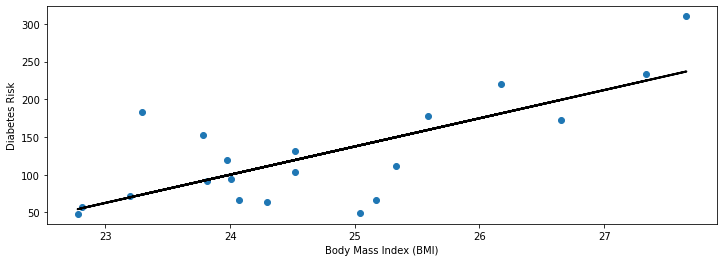

In [29]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)

### Predictions Using Supervised Learning

Given a new dataset of patients with a known BMI, we can use this model to estimate their diabetes risk.


Let's start by loading more data. We will load three new patients (shown in red below) that we haven't seen before.

In [30]:
# Collect 3 data points
diabetes_X_test = diabetes_X[:3]
diabetes_y_test = diabetes_y[:3]

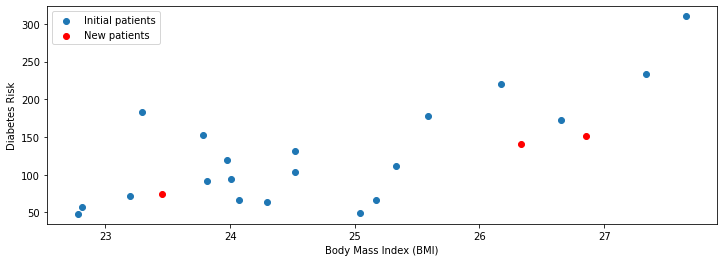

In [31]:
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])

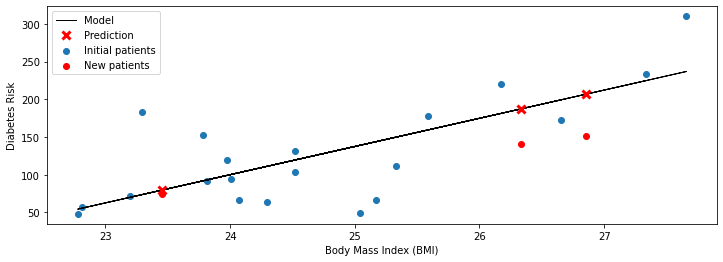

In [32]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test.reshape(-1, 1))

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])